In [1]:
import wordsegment
from bs4 import BeautifulSoup
import requests
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from googletrans import Translator
from google.cloud import translate

In [2]:
import re
from collections import Counter

wordsegment.load()

def tokenize(text):
    pattern = re.compile('[a-zA-Z]+')
    return (match.group(0) for match in pattern.finditer(text))

def pairs(iterable):
    iterator = iter(iterable)
    values = [next(iterator)]
    for value in iterator:
        values.append(value)
        yield ' '.join(values)
        del values[0]

In [3]:
def get_uni_bi_grams(text):
    wordsegment.UNIGRAMS.clear()
    wordsegment.UNIGRAMS.update(Counter(tokenize(text)))

    wordsegment.BIGRAMS.clear()
    wordsegment.BIGRAMS.update(Counter(pairs(tokenize(text))))
    
    unigrams = wordsegment.UNIGRAMS
    uni = list(wordsegment.UNIGRAMS.items())
    uni.sort(key=lambda x: x[1], reverse=True)

    bigrams = wordsegment.BIGRAMS
    big = list(wordsegment.BIGRAMS.items())
    big.sort(key=lambda x: x[1], reverse=True)
    
    return {'dictt': {'uni': unigrams, 'bi': bigrams},
            'listt': {'uni': uni, 'bi': big}}

## 1. English Books

In [4]:
%%time

english_book_links_file_name = 'english_book_links.pkl'

try:
    with open(os.path.join(os.curdir, 'Data', english_book_links_file_name), 'rb') as infile:
        english_book_links = pickle.load(infile)
except:
    english_link = ['http://www.gutenberg.org/ebooks/subject/7072', 
                   'http://www.gutenberg.org/ebooks/subject/7072?start_index=26',
                   'http://www.gutenberg.org/ebooks/subject/3203',
                   'http://www.gutenberg.org/ebooks/subject/3203?start_index=26']
    

    english_book_links = []
    count = 0
    for i1 in tnrange(len(english_link), desc='1st loop'):
        page_link = english_link[i1]
        response = requests.get(page_link)
        soup = BeautifulSoup(response.content, 'html.parser')
        book_links = soup.find_all('li', {'class': 'booklink'})
        #print(len(book_links))
        for i2 in tqdm_notebook(range(len(book_links)), desc='detail', leave=False):
            book_link = book_links[i2]
            real_book_link = 'http://www.gutenberg.org' + book_link.a['href']
            response = requests.get(real_book_link)
            soup = BeautifulSoup(response.content, 'html.parser')
            utf_a = soup.find('a', type=lambda x: x and 'text/plain' in x)

            utf_link = utf_a['href']
            
            english_book_links.append('http:' + utf_link)
            count = count + 1
            #print(str(count) + ' book links added.')
    
    
    with open(os.path.join(os.curdir, 'Data', english_book_links_file_name), 'wb') as outfile:
        pickle.dump(english_book_links, outfile)

Wall time: 35.9 ms


In [5]:
english_book_links[:2]

['http://www.gutenberg.org/ebooks/53416.txt.utf-8',
 'http://www.gutenberg.org/ebooks/34089.txt.utf-8']

In [6]:
%%time

english_text_file_name = 'english_text.pkl'

try:
    with open(os.path.join(os.curdir, 'Data', english_text_file_name), 'rb') as infile:
        english_text = pickle.load(infile)

except:
    english_text = ''
    for book_link in tqdm(english_book_links):
        response = requests.get(book_link)
        english_text = english_text + response.text
    
    with open(os.path.join(os.curdir, 'Data', english_text_file_name), 'wb') as outfile:
        pickle.dump(english_text, outfile)

Wall time: 765 ms


In [7]:
%%time

eng_res = get_uni_bi_grams(english_text)

Wall time: 18.3 s


In [8]:
eng_uni = pd.DataFrame(eng_res['listt']['uni'], columns=['word', 'freq'])
eng_bi = pd.DataFrame(eng_res['listt']['bi'], columns=['pair', 'freq'])

## 2. German Books

In [9]:
%%time

german_book_links_file_name = 'german_book_links.pkl'
try:
    with open(os.path.join(os.curdir, 'Data', german_book_links_file_name), 'rb') as infile:
        german_book_links = pickle.load(infile)
except:
    german_link = ['http://www.gutenberg.org/ebooks/subject/18100', 
                   'http://www.gutenberg.org/ebooks/subject/18100?start_index=26',
                   'http://www.gutenberg.org/ebooks/subject/18100?start_index=51']
    

    german_book_links = []
    count = 0
    for i1 in tnrange(len(german_link), desc='1st loop'):
        page_link = german_link[i1]
        response = requests.get(page_link)
        soup = BeautifulSoup(response.content, 'html.parser')
        book_links = soup.find_all('li', {'class': 'booklink'})
        #print(len(book_links))
        for i2 in tqdm_notebook(range(len(book_links)), desc='detail', leave=False):
            book_link = book_links[i2]
            real_book_link = 'http://www.gutenberg.org' + book_link.a['href']
            response = requests.get(real_book_link)
            soup = BeautifulSoup(response.content, 'html.parser')
            utf_a = soup.find('a', type=lambda x: x and 'text/plain' in x)

            utf_link = utf_a['href']
            
            german_book_links.append('http:' + utf_link)
            count = count + 1
            #print(str(count) + ' book links added.')
    
    
    with open(os.path.join(os.curdir, 'Data', german_book_links_file_name), 'wb') as outfile:
        pickle.dump(german_book_links, outfile)

Wall time: 31.2 ms


In [10]:
german_book_links[:3]

['http://www.gutenberg.org/ebooks/29376.txt.utf-8',
 'http://www.gutenberg.org/ebooks/2403.txt.utf-8',
 'http://www.gutenberg.org/files/53628/53628-0.txt']

In [11]:
%%time

german_text_file_name = 'german_text.pkl'

try:
    with open(os.path.join(os.curdir, 'Data', german_text_file_name), 'rb') as infile:
        german_text = pickle.load(infile)

except:
    german_text = ''
    for book_link in tqdm(german_book_links):
        response = requests.get(book_link)
        german_text = german_text + response.text
    
    with open(os.path.join(os.curdir, 'Data', german_text_file_name), 'wb') as outfile:
        pickle.dump(german_text, outfile)


Wall time: 483 ms


In [12]:
%%time

ger_res = get_uni_bi_grams(german_text)

Wall time: 8.5 s


In [13]:
ger_uni = pd.DataFrame(ger_res['listt']['uni'], columns=['word', 'freq'])
ger_bi = pd.DataFrame(ger_res['listt']['bi'], columns=['pair', 'freq'])

## 3. Change data frame to lower case

In [14]:
eng_uni['word'] = eng_uni['word'].str.lower()
eng_bi['pair'] = eng_bi['pair'].str.lower()
ger_uni['word'] = ger_uni['word'].str.lower()
ger_bi['pair'] = ger_bi['pair'].str.lower()

### some of the words are in both lower and upper case

For example, 'And' and 'and' should be the same, however in the dataframe it is the separated

In [15]:
eng_uni_temp = pd.DataFrame(eng_uni.groupby(['word'])['freq'].sum())
eng_uni_temp.reset_index(inplace=True)
eng_bi_temp = pd.DataFrame(eng_bi.groupby(['pair'])['freq'].sum())
eng_bi_temp.reset_index(inplace=True)

ger_uni_temp = pd.DataFrame(ger_uni.groupby(['word'])['freq'].sum())
ger_uni_temp.reset_index(inplace=True)
ger_bi_temp = pd.DataFrame(ger_bi.groupby(['pair'])['freq'].sum())
ger_bi_temp.reset_index(inplace=True)

In [16]:
eng_uni_temp.sort_values(by=['freq'], inplace=True, ascending=False)
eng_bi_temp.sort_values(by=['freq'], inplace=True, ascending=False)
ger_uni_temp.sort_values(by=['freq'], inplace=True, ascending=False)
ger_bi_temp.sort_values(by=['freq'], inplace=True, ascending=False)

In [17]:
total_freq_eng_uni = eng_uni_temp['freq'].sum()
total_freq_eng_bi = eng_bi_temp['freq'].sum()
total_freq_ger_uni = ger_uni_temp['freq'].sum()
total_freq_ger_bi = ger_bi_temp['freq'].sum()

## 4. Translation between different languages

In [87]:
import os
save_joined_file = 'result.pkl'
save_joined_file_path = os.path.join(os.curdir, 'Data', save_joined_file)
exists = os.path.isfile(save_joined_file_path)
exists

True

In [88]:
if exists:
    with open(save_joined_file_path, 'rb') as infile:
        joined_2_df_sorted, eng_df, ger_df, ger_df_grouped, ger_df_ori, ger_df_ori_grouped = pickle.load(infile)

In [52]:
if not exists:
    # initiate a translator client
    translate_client = translate.Client()

In [53]:
if not exists:
    count_to_ana = 1000
    lims = 100

In [54]:
if not exists:
    ger_list = list(ger_uni_temp['word'])[:count_to_ana]
    print(ger_list[:100])

In [55]:
if not exists:
    target = 'en'
    source = 'de'

    chunks = [ger_list[(x):(x + lims)] for x in range(0, len(ger_list), lims)]

    ger_translated_text = []
    for chunk in tqdm(chunks):
        translation = translate_client.translate(
            chunk,
            source_language=source,
            target_language=target)
        ger_translated_text = ger_translated_text + [trans['translatedText'].lower() for trans in translation]

In [56]:
if not exists:
    print(ger_translated_text[:100])

In [57]:
if not exists:
    ger_df = pd.DataFrame(ger_translated_text, columns=['word'])
    ger_df['freq_ger_to_eng'] = pd.Series(list(ger_uni_temp['freq'])[:count_to_ana])
    ger_df.shape

In [58]:
if not exists:
    ger_df_grouped = ger_df.groupby(['word']).sum()
    ger_df_grouped.reset_index(inplace=True)
    ger_df_grouped.shape

In [59]:
if not exists:
    ger_df_ori = pd.DataFrame(ger_translated_text, columns=['word'])
    ger_df_ori['original german'] = pd.Series(list(ger_uni_temp['word'])[:count_to_ana])
    ger_df_ori_grouped = pd.DataFrame(ger_df_ori.groupby(['word'])['original german'].apply(lambda x: ', '.join(x)))
    ger_df_ori_grouped.reset_index(inplace=True)
    ger_df_ori_grouped.shape

In [60]:
if not exists:
    eng_df = eng_uni_temp.loc[0:count_to_ana, ['word', 'freq']]

In [61]:
if not exists:
    joined_1_df = ger_df_grouped.merge(eng_df, left_on='word', right_on='word', suffixes=('_ger', '_eng'))
    joined_1_df.head()

In [62]:
if not exists:
    joined_2_df = joined_1_df.merge(ger_df_ori_grouped, left_on='word', right_on='word', suffixes=('_ger', '_eng'))
    joined_2_df.head()

In [63]:
if not exists:
    joined_2_df.sort_values(by=['freq'], inplace=True, ascending=False)
    joined_2_df['freq_normalized'] = joined_2_df['freq'] / total_freq_eng_uni
    joined_2_df['freq_ger_normalized'] = joined_2_df['freq_ger_to_eng'] / total_freq_ger_uni
    joined_2_df['ratio'] = joined_2_df['freq_ger_normalized'] / joined_2_df['freq_normalized']
    joined_2_df_sorted = joined_2_df.reset_index()

In [86]:
if not exists:
    with open(save_joined_file_path, 'wb') as outfile:
        pickle.dump([joined_2_df_sorted, eng_df, ger_df, ger_df_grouped, ger_df_ori, ger_df_ori_grouped], outfile)

## 5. Analyze the top 20 words

1. `joined_2_df_sorted`:
    the file that combined the german and english together

2. `eng_df`:
    the file that only has english words and frequency in it

3. `ger_df_ori`:
    the file that only has german words and translation in it
    
4. `ger_df`;
    the file that only has translation of german words and frequency in it

In [82]:
joined_2_df_sorted.head(2)

,index,word,freq_ger_to_eng,freq,original german,freq_normalized,freq_ger_normalized,ratio
0,0,a,20314,188543,"eine, a",0.022538,0.005430,0.240921
1,237,i,37288,145375,ich,0.017378,0.009967,0.573547


In [101]:
eng_df.reset_index(inplace=True)
eng_df.head(3)

,index,word,freq
0,0,a,188543
1,27319,i,145375
2,28007,in,130395


In [92]:
ger_df.head(3)

,word,freq_ger_to_eng
0,and,115535
1,the,84787
2,the,82195


In [94]:
ger_df_detail = ger_df_ori.copy()
ger_df_detail['freq'] = ger_df['freq_ger_to_eng']
ger_df_detail.head(10)

,word,original german,freq
0,and,und,115535
1,the,die,84787
2,the,der,82195
3,you,sie,55485
4,he,er,52429
5,in,in,51038
6,to,zu,44648
7,the,das,43068
8,the,den,39865
9,i,ich,37288


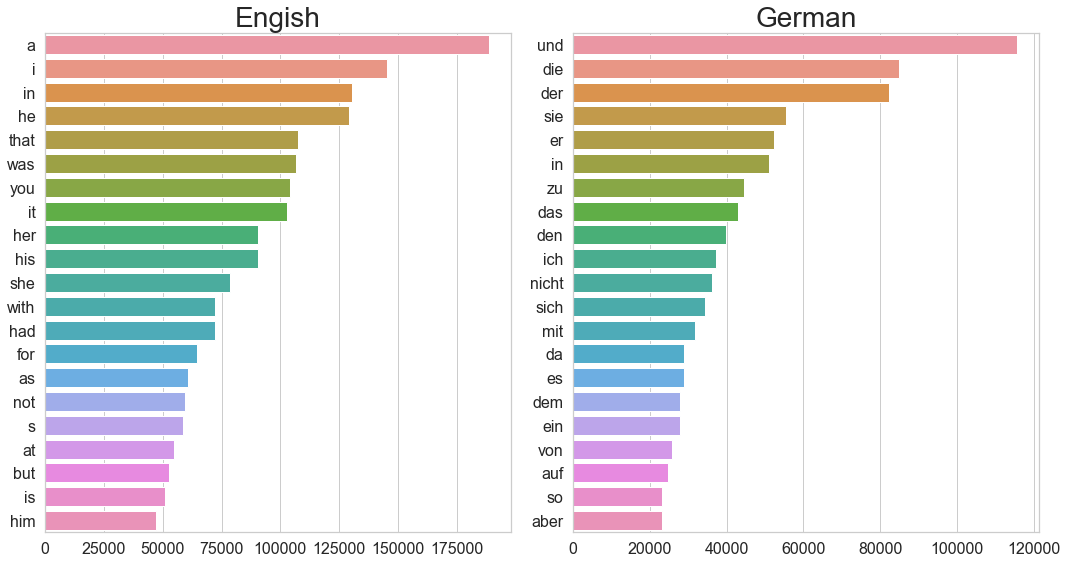

In [112]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 2, figsize=(15, 8))
title_font_size = 28
label_font_size = 20
tick_font_size = 16

sns.barplot(y='word', x='freq', data=eng_df.loc[0:20, ['word', 'freq']], ax=axes[0])
axes[0].set_title('Engish', fontsize=title_font_size)
axes[0].set_ylabel('', fontsize=label_font_size)
axes[0].set_xlabel('', fontsize=label_font_size)
axes[0].tick_params(labelsize=tick_font_size)

sns.barplot(y='original german', x='freq', data=ger_df_detail.loc[0:20, ['original german', 'freq']], ax=axes[1])
axes[1].set_title('German', fontsize=title_font_size)
axes[1].set_ylabel('', fontsize=label_font_size)
axes[1].set_xlabel('', fontsize=label_font_size)
axes[1].tick_params(labelsize=tick_font_size)

plt.tight_layout()
f.savefig(os.path.join(os.curdir, 'Pics', '1_high_freq_words.png'))
plt.show()

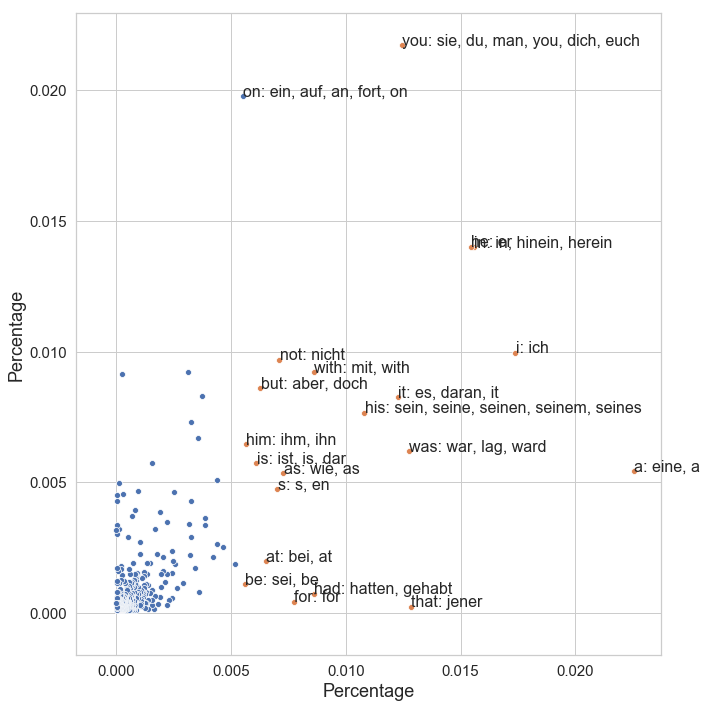

In [126]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 1, figsize=(10, 10))

top_num = 20
sns.scatterplot(x="freq_normalized", 
                y="freq_ger_normalized",
                data=joined_2_df_sorted[top_num:],
                ax=axes)

sns.scatterplot(x="freq_normalized", 
                y="freq_ger_normalized", 
                data=joined_2_df_sorted[:top_num],
                ax=axes)

for word, ori, freq_normalized,\
    freq_ger_normalized in zip(joined_2_df_sorted.loc[:top_num, 'word'],
                               joined_2_df_sorted.loc[:top_num, 'original german'],
                               joined_2_df_sorted.loc[:top_num, 'freq_normalized'],
                               joined_2_df_sorted.loc[:top_num, 'freq_ger_normalized']):
    axes.text(freq_normalized + .00002, freq_ger_normalized, word + ': ' + ori, fontsize=16)

axes.set_ylabel('Percentage', fontsize=18)
axes.set_xlabel('Percentage', fontsize=18)
axes.tick_params(labelsize=15)

plt.tight_layout()
f.savefig(os.path.join(os.curdir, 'Pics', '2_compare_high_words.png'))
plt.show()

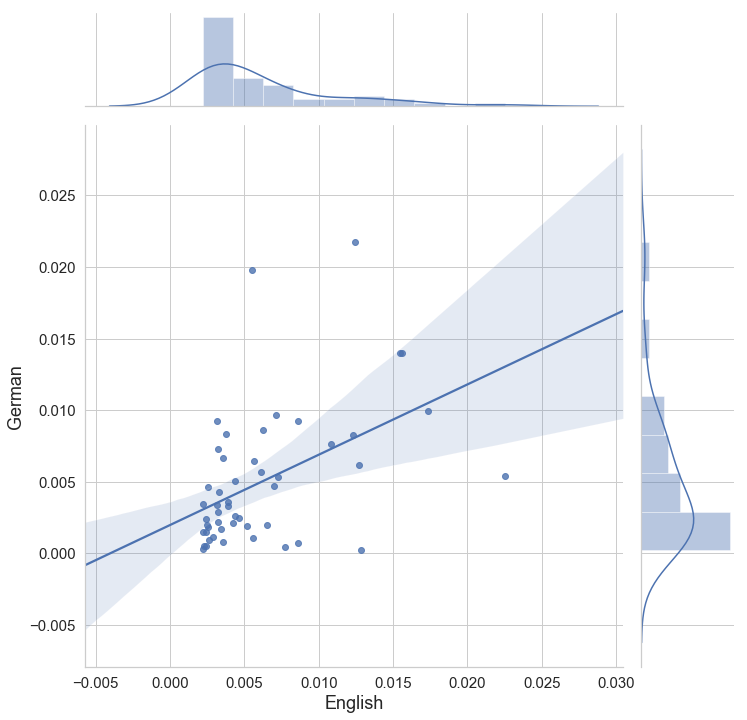

In [146]:
sns.set(style="whitegrid")

top_num = 50
tg = joined_2_df_sorted[:top_num]
ax1 = sns.jointplot(x="freq_normalized", 
                   y="freq_ger_normalized", 
                   data=tg, 
                   kind="reg", height=10)
ax1.ax_joint.set_ylabel('German', fontsize=18)
ax1.ax_joint.set_xlabel('English', fontsize=18)
ax1.ax_joint.tick_params(labelsize=15)


ax1.savefig(os.path.join(os.curdir, 'Pics', '3_ratio_compare.png'))
plt.show()